In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

from pyod.models.hbos import HBOS

In [2]:
!pip install pyod

In [2]:
PROJECT_PATH = "C:/Users/amlas/Documents/M1 SID/ProjetInterpromo/ProjectInterPromo/"

In [8]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [3]:
# Lecture du fichier de donnée
data_v0 = pd.read_csv(PROJECT_PATH + "data/sortie/Données_v0/Donnees_V0_NAN_supprimes.csv")

print("Nombre de fraude :", sum(data_v0["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_v0))
print("Ratio : ", sum(data_v0["TOP_FRAUDE"]) / len(data_v0) * 100)

# Suppression des variables qualitative
quali_col = []
count = 0
for i, name in zip(data_v0.dtypes, data_v0.columns):
    if i == "object":
        quali_col.append(name)

data_quanti = data_v0.drop(columns=quali_col + ["Unnamed: 0"])

# 
data_quanti = data_quanti.sample(10000)

print("------------ Sur un echantillion ------------")
print("Nombre de fraude :", sum(data_quanti["TOP_FRAUDE"]))
print("Nombre de données : ", len(data_quanti))
print("Ratio : ", sum(data_quanti["TOP_FRAUDE"]) / len(data_quanti) * 100)

Nombre de fraude : 1479
Nombre de données :  644348
Ratio :  0.22953435100287423
------------ Sur un echantillion ------------
Nombre de fraude : 23
Nombre de données :  10000
Ratio :  0.22999999999999998


In [4]:
# Modele de prediction qui retourne un score
data_quanti_out = data_quanti.drop(['TOP_FRAUDE','TOP_FRAUDE_VIREMENT','TOP_FRAUDE_CARTE'], axis=1)
outliers_fraction = 0.01
clf = HBOS(contamination = outliers_fraction)
xx,yy = np.meshgrid(np.linspace(0,1,100),np.linspace(0,1,100))
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [5]:
clf.fit(data_quanti)

HBOS(alpha=0.1, contamination=0.01, n_bins=10, tol=0.5)

In [6]:
score = clf.decision_function(data_quanti_out)
score
set(score)

{407.54655786275816,
 463.8554747279489,
 453.7856054278713,
 453.0202179819166,
 438.03269882708867,
 387.8965049292776,
 438.6118905613463,
 433.8233567401591,
 408.1159037673451,
 398.4264924507362,
 398.4264186067513,
 439.8237918038127,
 419.61835682991557,
 460.26049422076755,
 450.93709731066565,
 450.31682670454984,
 440.76549771545126,
 450.6338197927639,
 410.6239660762467,
 410.7906890328841,
 405.28377185078085,
 461.0285559990283,
 426.1955336117615,
 411.64672187494125,
 452.62591894046136,
 459.49129272608434,
 407.50959590174995,
 449.379303573282,
 399.1892728921067,
 449.56686273618885,
 455.45357506557275,
 394.78269117411696,
 445.3338736366337,
 434.42316371716674,
 435.48966542347875,
 456.4646590742873,
 446.63752958659336,
 456.56860874252243,
 456.5630810792304,
 441.58715169361375,
 406.17105143157016,
 447.54254728007675,
 447.32646186886143,
 453.2218253734614,
 448.76138890821915,
 428.8362078982017,
 428.0255522793876,
 428.89533143250344,
 408.31668930066

<ipython-input-8-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


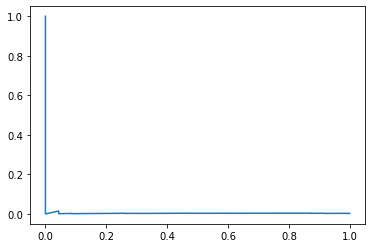

Air sous la courbe :  0.003190376120740063


In [9]:
value, f1_score, precision, recall = evaluation(score, data_quanti["TOP_FRAUDE"], display=True)

# L'air sous la courbe
print("Air sous la courbe : ", value)